In [1]:
%load_ext autoreload
%autoreload 2
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from importlib import reload
from kmeans import *
from tf_idf import *
from data import *
import pandas as pd
import numpy as np
from rfm import *
from evaluation import *

In [2]:
df = load_data()

In [3]:
t_rfm = rfm(df)
t_rfm = rfm_transform(t_rfm)
t_rfm.head(10)

,CustomerID,Frequency,Recency,Monetary
2592,16446,1,5,1.0
1466,16738,1,5,1.0
3665,16454,1,3,1.0
3674,14792,1,3,1.0
2151,17956,1,5,1.0
3435,16878,1,4,1.0
1973,17763,1,5,1.0
3204,13307,1,4,1.0
3274,16093,1,4,1.0
1741,12755,1,5,1.0


In [4]:
matrix = rfm_matrix(t_rfm)
sse, sscore, test_range = kmeans(matrix)

Clusters = 2 ,Silhouette Score = 0.44877
Clusters = 3 ,Silhouette Score = 0.38505
Clusters = 4 ,Silhouette Score = 0.39822
Clusters = 5 ,Silhouette Score = 0.37642
Clusters = 6 ,Silhouette Score = 0.37518
Clusters = 7 ,Silhouette Score = 0.39081
Clusters = 8 ,Silhouette Score = 0.37539
Clusters = 9 ,Silhouette Score = 0.37931
Clusters = 10 ,Silhouette Score = 0.38034
Clusters = 11 ,Silhouette Score = 0.37254
Clusters = 12 ,Silhouette Score = 0.39779
Clusters = 13 ,Silhouette Score = 0.38274
Clusters = 14 ,Silhouette Score = 0.39681


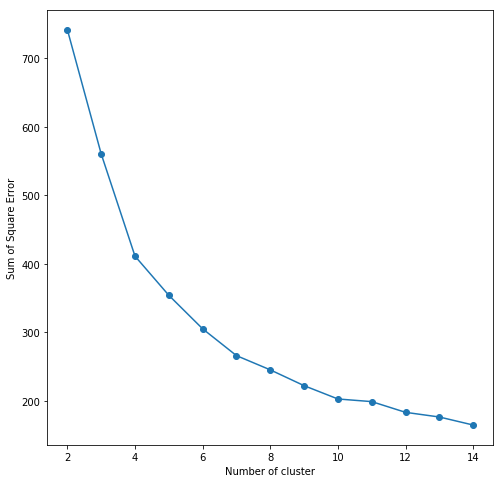

In [5]:
# Plot elbow method
plt.figure(figsize=(8, 8))
plt.plot(list(test_range), sse, '-o')
plt.xlabel('Number of cluster')
plt.ylabel('Sum of Square Error')

# Display the Silhouette score
for n_cluster, score in sscore.items():
    print("Clusters = {}".format(n_cluster),",Silhouette Score = {}".format(score))

In [6]:
clusters = kmeans(matrix = matrix, cluster_num = 4)
typical_rfm = rfm_write_back(typical_rfm,clusters)
typical_rfm.groupby('Cluster',as_index = False).count()

NameError: name 'typical_rfm' is not defined